# Tensorflow (DNN)

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

## Get the Data

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('bank_note_data.csv')

**Check the head of the Data**

In [65]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

**Import seaborn and set matplolib inline for viewing**

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

**Create a Countplot of the Classes (Authentic 1 vs Fake 0)**

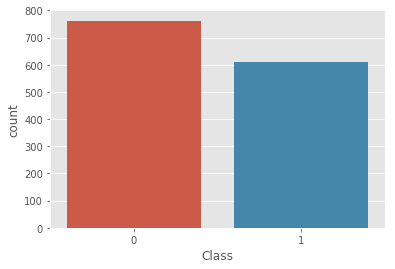

In [67]:
sns.countplot(df['Class'])

**Create a PairPlot of the Data with Seaborn, set Hue to Class**

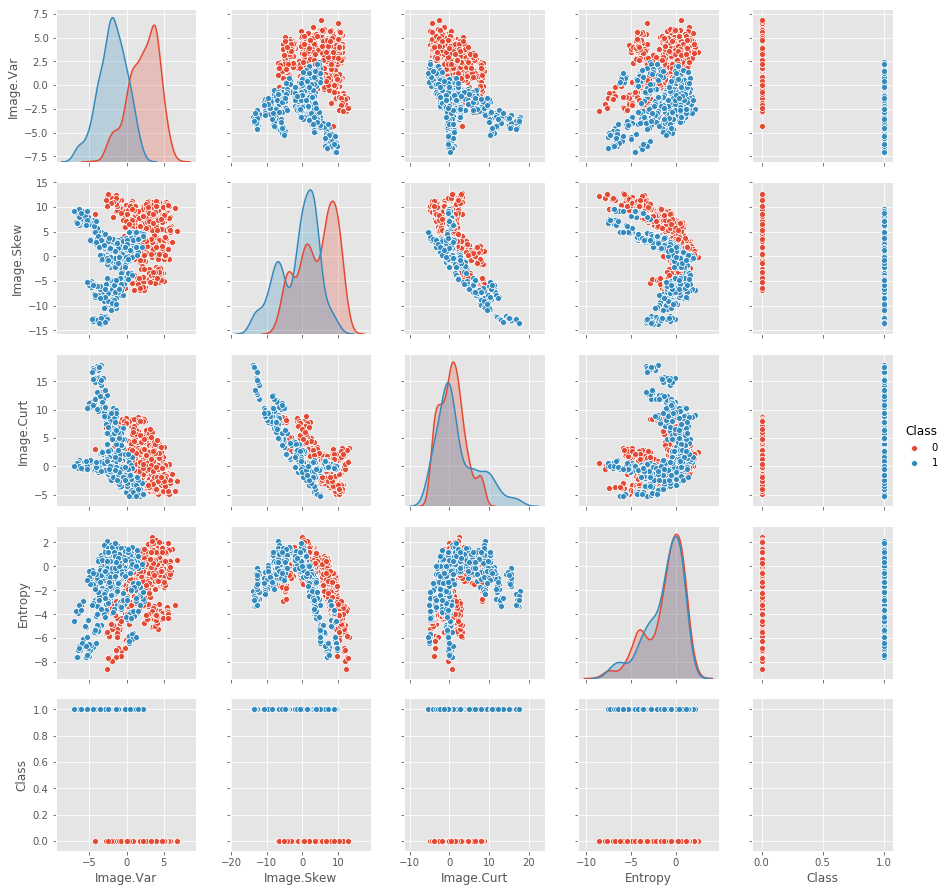

In [68]:
sns.pairplot(df, hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [69]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [70]:
scalar = StandardScaler()

**Fit scaler to the features.**

In [71]:
scalar.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [72]:
scaled_features = scalar.transform(df.drop('Class', axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [73]:
df_new = pd.DataFrame(scaled_features, columns=df.drop('Class',axis=1).columns[:])
df_new.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Create two objects X and y which are the scaled feature values and labels respectively.**

In [74]:
X = df_new
y = df['Class']

**Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Tensorflow

In [77]:
import tensorflow as tf

**Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [78]:
df_new.columns

Index([u'Image.Var', u'Image.Skew', u'Image.Curt', u'Entropy'], dtype='object')

In [79]:
feature_cols = []

for col in df_new.columns:
    feature_cols.append(tf.feature_column.numeric_column(col))

In [80]:
feature_cols

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

**Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [81]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=2, feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff6f7986f90>, '_model_dir': '/tmp/tmpxxir7n', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


**Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big.**

In [82]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=20, shuffle=True)

**Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [83]:
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxxir7n/model.ckpt.
INFO:tensorflow:loss = 13.626827, step = 1
INFO:tensorflow:Saving checkpoints for 46 into /tmp/tmpxxir7n/model.ckpt.
INFO:tensorflow:Loss for final step: 0.2677409.


## Model Evaluation

**Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [84]:
predict_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

**Use the predict method from the classifier model to create predictions from X_test**

In [85]:
predictions = list(classifier.predict(input_fn=predict_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxxir7n/model.ckpt-46
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [86]:
predictions[100]

{'class_ids': array([1]),
 'classes': array(['1'], dtype=object),
 'logistic': array([0.99976534], dtype=float32),
 'logits': array([8.357257], dtype=float32),
 'probabilities': array([2.3463214e-04, 9.9976534e-01], dtype=float32)}

In [87]:
final_pred = []
for pred in predictions:
    final_pred.append(pred['class_ids'][0])

**Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(confusion_matrix(y_test, final_pred))

[[254   3]
 [  0 196]]


In [90]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       257
           1       0.98      1.00      0.99       196

   micro avg       0.99      0.99      0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



## Optional Comparison

**These are extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()

In [93]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
rfc_pred = rfc.predict(X_test)

In [95]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      0.99      1.00       196

   micro avg       1.00      1.00      1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [96]:
print(confusion_matrix(y_test, rfc_pred))

[[257   0]
 [  1 195]]
